# Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data Preprocessing

In [ ]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/yihuanxu/mban5110/main/data_set_hackathon.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


In [ ]:
# Convert 'Order Date' and 'Requested Delivery Date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

<ipython-input-45-2d2ce04bb2c0>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['order_date'] = pd.to_datetime(df['order_date'])
<ipython-input-45-2d2ce04bb2c0>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])


In [ ]:
df = df.replace('\\N', 0)

In [ ]:
df['Curr'].unique()

array(['RUB', 'DKK', 'NOK', 'EUR', 'CHF', 'SEK', 'CZK', 'PLN', 'GBP'],
      dtype=object)

In [ ]:
df['items']=pd.to_numeric(df['items'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 208.1+ KB


# Exploratory Data Analysis

In [ ]:
def convert_to_eur(row, currency_rates):
    currency = row['Curr']
    value = row['value']
    rate = currency_rates.get(currency, 1)  # Default to 1 if currency is already in EUR or unknown
    return value / rate

# Sample currency conversion rates to EUR (hypothetical)
currency_rates = {
    'RUB': 90,   # Example: 1 EUR = 90 RUB
    'DKK': 7.44, # 1 EUR = 7.44 DKK
    'NOK': 10,   # 1 EUR = 10 NOK
    'EUR': 1,    # 1 EUR = 1 EUR
    'CHF': 1.08, # 1 EUR = 1.08 CHF
    'SEK': 10.16,# 1 EUR = 10.16 SEK
    'CZK': 25.34,# 1 EUR = 25.34 CZK
    'PLN': 4.59, # 1 EUR = 4.59 PLN
    'GBP': 0.85  # 1 EUR = 0.85 GBP
}

# Convert the 'value' column to EUR
df['value_in_EUR'] = df.apply(lambda row: convert_to_eur(row, currency_rates), axis=1)

In [ ]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,value_in_EUR
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,25.966667
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,112.891667
2,2009-07-16,2010-04-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,33.250000
3,2009-07-17,2010-04-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,45.125000
4,2009-07-21,2010-01-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,24.541667
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,128.520000
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,128.520000
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,128.520000
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,107.100000


### Montly Trend Analysis as per different products

In [ ]:
# Convert 'Order Date' to datetime and extract month
df['Month'] = pd.to_datetime(df['order_date']).dt.month

### Seasonal Trend Analysis as per different product

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

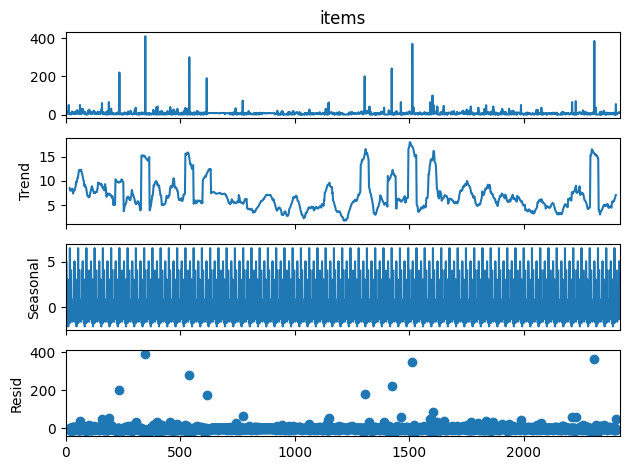

In [ ]:
# Creating seasonal dummy variables
df['Season'] = df['Month'].apply(get_season)
seasonal_dummies = pd.get_dummies(df['Season'], drop_first=True)
df = pd.concat([df, seasonal_dummies], axis=1)

# Using a time series decomposition method to analyze seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is indexed by date and 'Items' is the demand quantity
result = seasonal_decompose(df['items'], model='additive', period=36)  # period depends on data frequency
result.plot()
plt.show()

### Price

In [ ]:
# Unit Price
df['Unit_Price'] = df['value_in_EUR'] / df['items']

In [ ]:
df['Unit_Price']=df['Unit_Price'].fillna(0)

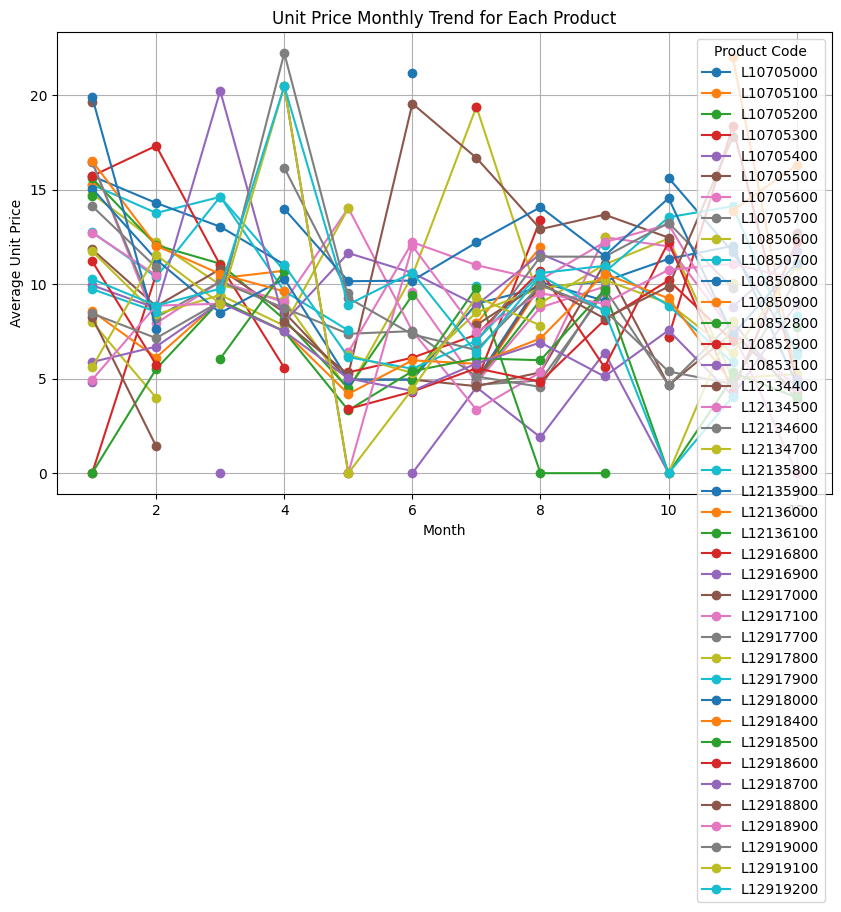

In [ ]:
# Unit price's trend across the entire period

unit_price_trend = df.groupby(['Month', 'Product Code'])['Unit_Price'].mean().unstack()

# Plot the trend of unit price for each product over the years
unit_price_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Unit Price Monthly Trend for Each Product')
plt.xlabel('Month')
plt.ylabel('Average Unit Price')
plt.grid(True)
plt.legend(title='Product Code')
plt.show()

In [ ]:
quantiles = df['Unit_Price'].quantile([0.25, 0.5, 0.75])



# Creating bins with custom labels for 4 categories

bins = pd.cut(df['Unit_Price'], bins=[df['Unit_Price'].min(), *quantiles, df['Unit_Price'].max()],

              labels=["Cheap", "Moderate", "Expensive", "Luxury"])



# Assigning the bin labels to a new column in the original dataframe

df['Price_Category'] = bins



# Displaying the first few rows of the modified dataframe

df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,value_in_EUR,Month,Season,Spring,Summer,Winter,Unit_Price,Price_Category
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,25.966667,7,Summer,0,1,0,4.327778,Cheap
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,112.891667,7,Summer,0,1,0,4.908333,Moderate
2,2009-07-16,2010-04-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,33.250000,7,Summer,0,1,0,4.750000,Moderate
3,2009-07-17,2010-04-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,45.125000,7,Summer,0,1,0,5.013889,Moderate
4,2009-07-21,2010-01-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,24.541667,7,Summer,0,1,0,4.908333,Moderate


In [ ]:
category_item_sum = df.groupby('Price_Category')['items'].sum()

In [ ]:
category_item_sum

Price_Category
Cheap        3107
Moderate     4873
Expensive    4834
Luxury       4377
Name: items, dtype: int64

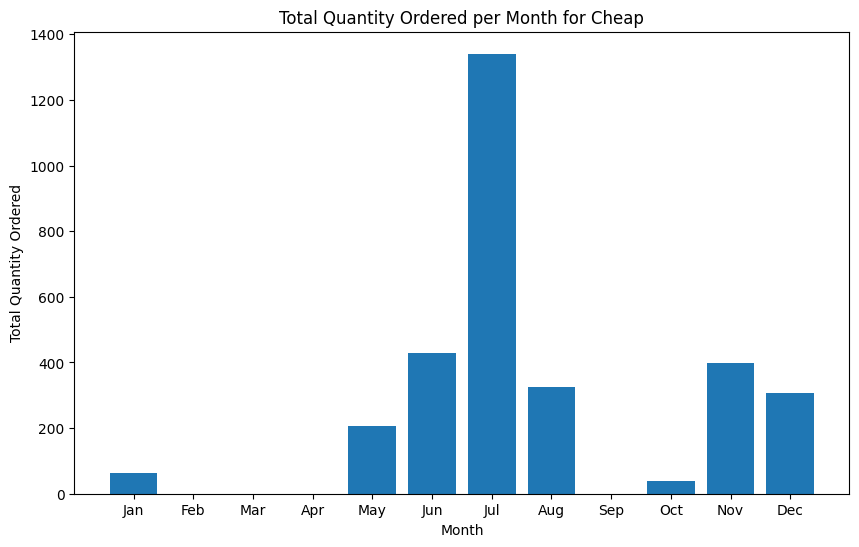

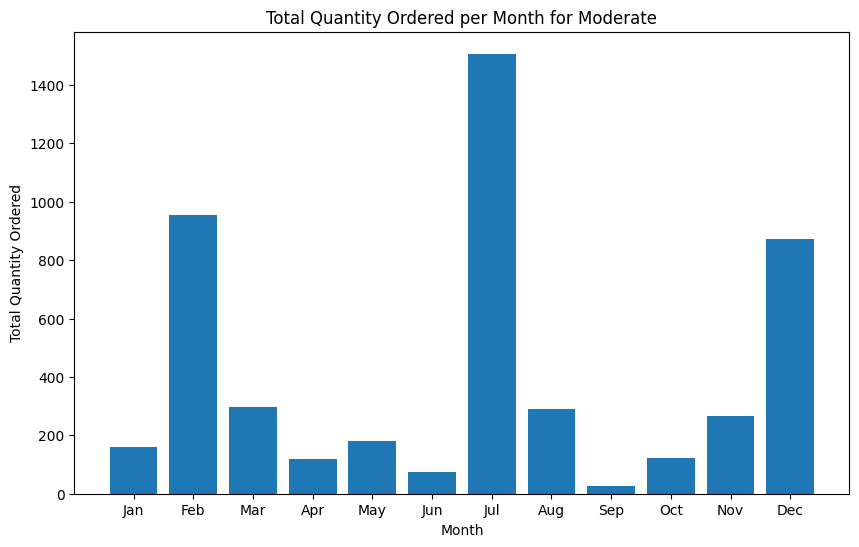

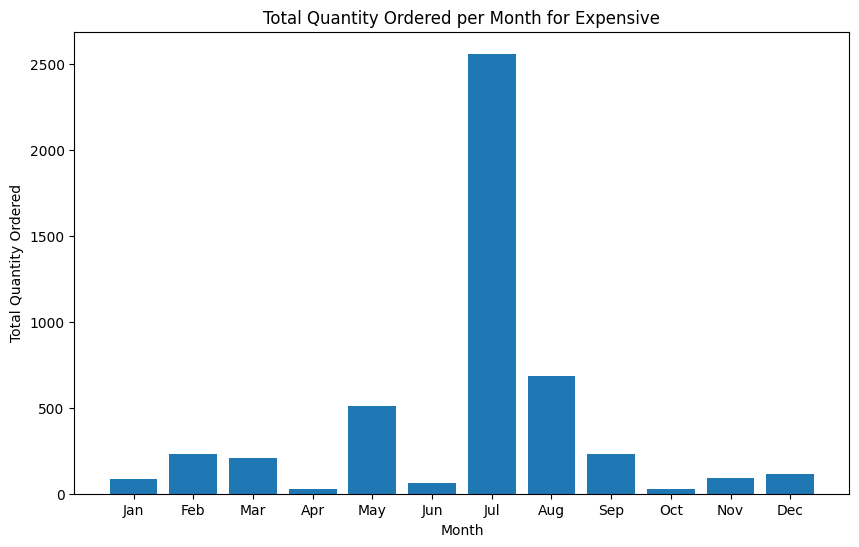

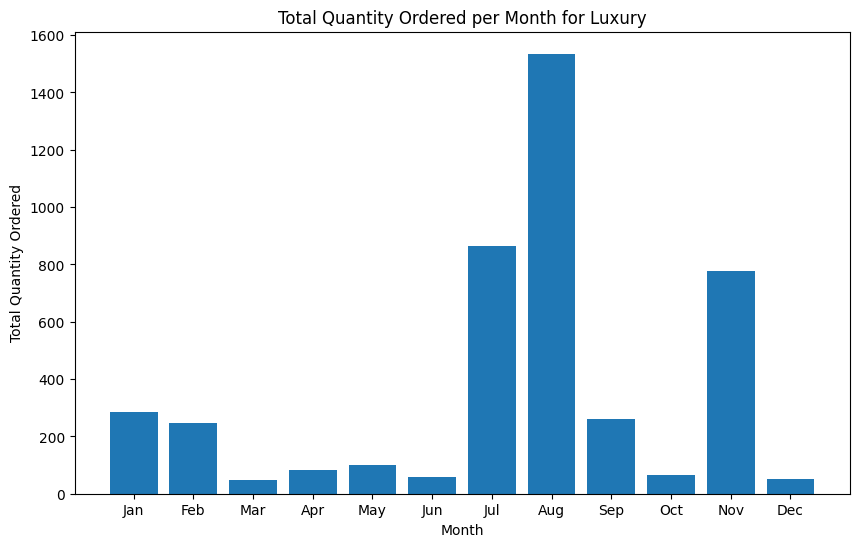

In [ ]:
# Quantity Ordered Per Product Code
quantity_per_product_per_month = df.groupby(['Month', 'Price_Category'])['items'].sum().reset_index()

# Filter the DataFrame for each Product Code and plot
Price_Category = quantity_per_product_per_month['Price_Category'].unique()

for Price_Category in Price_Category:
    product_data = quantity_per_product_per_month[quantity_per_product_per_month['Price_Category'] == Price_Category]
    plt.figure(figsize=(10, 6))
    plt.bar(product_data['Month'], product_data['items'])
    plt.title(f'Total Quantity Ordered per Month for {Price_Category}')
    plt.xlabel('Month')
    plt.ylabel('Total Quantity Ordered')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

# Feature Engineering

### Advance Order or Urgency Order

In [ ]:
# Calculate Lead Time in days
df['Lead Time'] = (df['requested_delivery_date'] - df['order_date']).dt.days


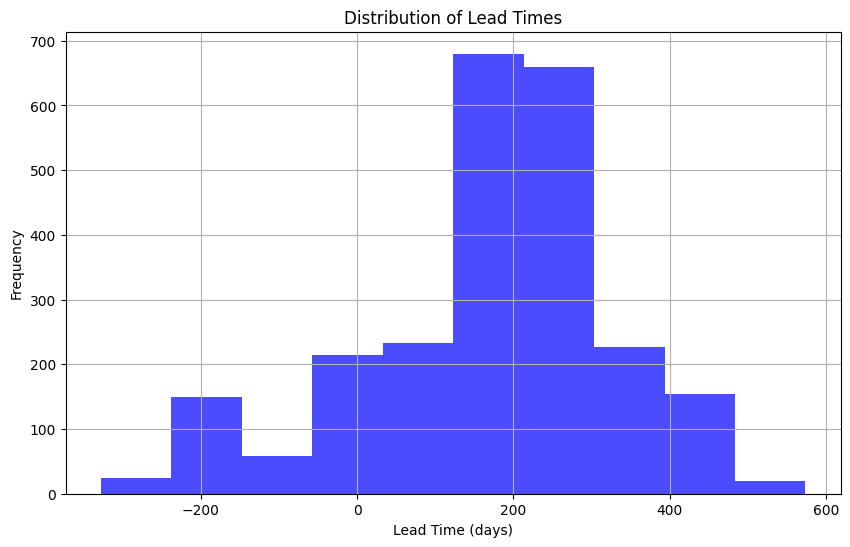

In [ ]:
# Plot the distribution of Lead Times
plt.figure(figsize=(10, 6))
plt.hist(df['Lead Time'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Create the Order Type column (1 for Advance, 0 for Urgent)；lead time threshold is 30 days
df['Order Priority'] = df['Lead Time'].apply(lambda x: 1 if x > 30 else 0)


# Model Development

In [ ]:
# Calculate the mean of 'Unit_Price', excluding the problematic row
unit_price_mean = df.drop(index=929)['Unit_Price'].mean()

# Replace the infinite value in 'Unit_Price' for the problematic row
df.at[929, 'Unit_Price'] = unit_price_mean

# Check the replaced value
print(df.loc[929, 'Unit_Price'])


8.428177570790817


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Price_Category'])

# Splitting the dataset into training and testing sets
X = df[['Unit_Price']]  # Features
y = df['Category_Encoded']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting and Evaluating the Model
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.9972451790633609


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df['Predicted_Category_Encoded'] = logistic_model.predict(df[['Unit_Price']])
df['Predicted_Category'] = label_encoder.inverse_transform(df['Predicted_Category_Encoded'])

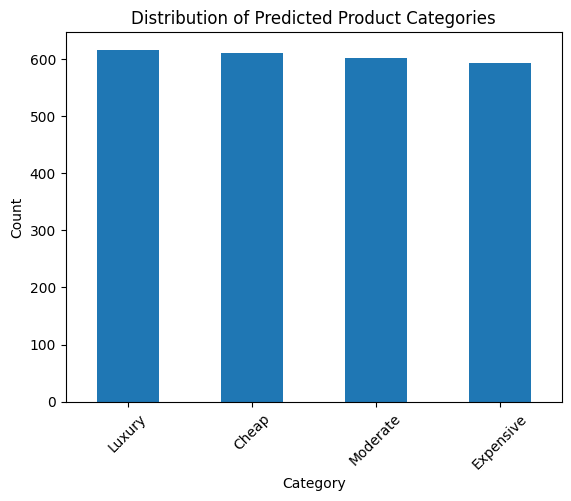

In [ ]:
predicted_category_counts = df['Predicted_Category'].value_counts()
predicted_category_counts.plot(kind='bar')
plt.title('Distribution of Predicted Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,Month,Season,Spring,Summer,Winter,Unit_Price,Price_Category,Lead Time,Order Priority,Category_Encoded
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,7,Summer,0,1,0,4.327778,Cheap,199,1,0
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,7,Summer,0,1,0,4.908333,Moderate,252,1,3
2,2009-07-16,2010-04-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,7,Summer,0,1,0,4.750000,Moderate,260,1,3
3,2009-07-17,2010-04-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,7,Summer,0,1,0,5.013889,Moderate,259,1,3
4,2009-07-21,2010-01-02,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,7,Summer,0,1,0,4.908333,Moderate,165,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,...,7,Summer,0,1,0,10.710000,Expensive,217,1,1
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,...,7,Summer,0,1,0,10.710000,Expensive,217,1,1
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,...,7,Summer,0,1,0,10.710000,Expensive,217,1,1
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,...,7,Summer,0,1,0,10.710000,Expensive,217,1,1


# Model Validation and Regularization

# Seasonality

In [ ]:
df = df.sort_values('order_date')

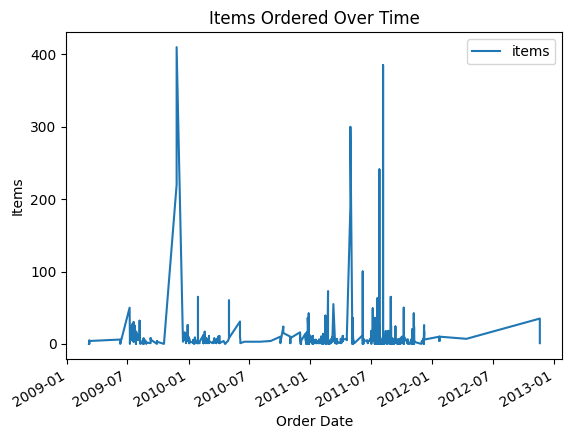

In [ ]:
df.plot(x='order_date', y='items', kind='line')
plt.xlabel('Order Date')
plt.ylabel('Items')
plt.title('Items Ordered Over Time')
plt.show()

<Figure size 1400x700 with 0 Axes>

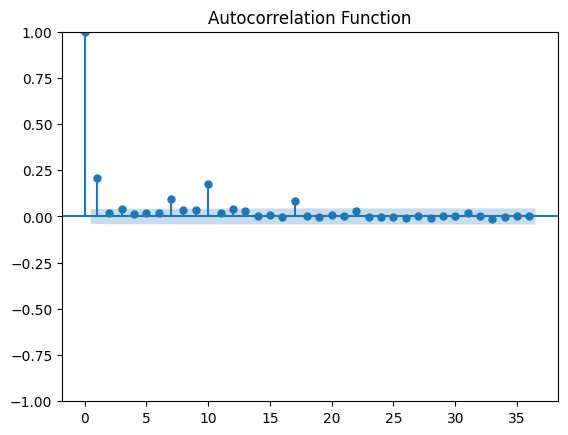

<Figure size 1400x700 with 0 Axes>

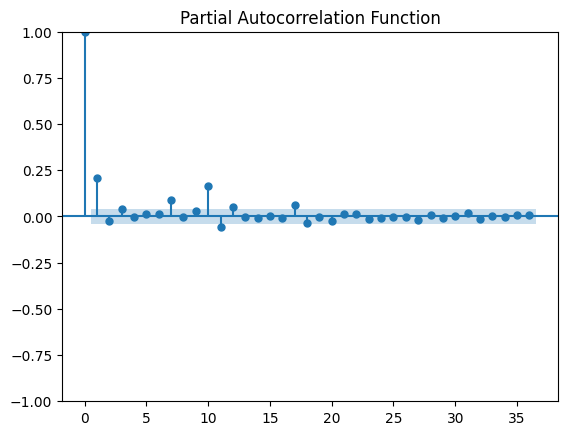

In [ ]:
# Plot ACF
plt.figure(figsize=(14,7))
plot_acf(df['items'], lags=36)
plt.title('Autocorrelation Function')
plt.show()

# Plot PACF
plt.figure(figsize=(14,7))
plot_pacf(df['items'], lags=36, method='ywm')
plt.title('Partial Autocorrelation Function')
plt.show()

In [ ]:
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
s = 12  # Seasonal period (e.g., 12 for monthly data)

# Create the SARIMA model
sarima_model = sm.tsa.SARIMAX(df['items'], order=(1, 1, 1), seasonal_order=(P, D, Q, s))

# Fit the model to the data
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              items   No. Observations:                 2420
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -10410.494
Date:                            Mon, 11 Dec 2023   AIC                          20830.989
Time:                                    23:13:41   BIC                          20859.920
Sample:                                         0   HQIC                         20841.512
                                           - 2420                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1985      0.005     42.440      0.000       0.189       0.208
ma.L1         -0.9906      0.002   

In [ ]:
forecast_model = sarima_results.get_forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast_mean = forecast_model.predicted_mean
forecast_mean

2420    4.875321
2421    7.223675
2422    8.175418
2423    9.585749
2424    5.718263
2425    8.251060
2426    7.546965
2427    8.628178
2428    7.110857
2429    6.379762
2430    8.186380
2431    6.377555
Name: predicted_mean, dtype: float64